In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import losses
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss', marker=".")
    #plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [7]:
x = []
y = []
for i in range(1, 10001):
    raw_data = np.load(f'data/test_silica/{i}.npz')
    x.append(np.concatenate((raw_data["n_s"]/max(raw_data["n_s"]), raw_data["n_d"]/max(raw_data["n_d"])), axis=0))
    y.append(raw_data["a"])

In [8]:
x = np.array(x)
factor = max(y)
y = np.array(y) / factor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=len(x_train[0], )),
        layers.Dense(400, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               366800    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 473191 (1.81 MB)
Trainable params: 473191 

In [10]:
model.compile(optimizer='adam',
             loss="mean_absolute_error")

Epoch 1/100
67/67 [==============================] - 2s 6ms/step - loss: 0.2452
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1917
Epoch 3/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1945
Epoch 4/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1905
Epoch 5/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1894
Epoch 6/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1893
Epoch 7/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1879
Epoch 8/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1855
Epoch 9/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1855
Epoch 10/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1850
Epoch 11/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1836
Epoch 12/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1821
Epoch 13/100
67/67 [=================

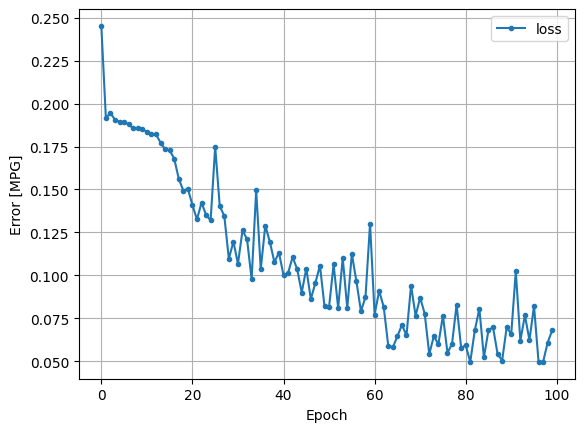

In [11]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=100, batch_size=100, shuffle=True)
plot_loss(history)

In [12]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
accuracy

0.03602811321616173

In [13]:
res = model.predict(np.array(x_test))

104/104 [==============================] - 0s 2ms/step


In [20]:
i = 1
res[i][0], y_test[i]

(0.45570403, 0.48484848484848486)